# ACQUIRE THE DATA
The dataset used in this project originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The primary objective of this dataset is to apply various machine learning models to predict, diagnostically, whether a patient has diabetes based on the measurements provided in the dataset.

# IMPORT LIBRARIES

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# IMPORT DATA

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
len(data)

768

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# DATA PREPROCESSING

# Checking for missing values

In [8]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

# checking zeros in dataset

In [9]:
(data == 0).any()

Pregnancies                  True
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [10]:
# checking zeros in dataset
preg = (data['Pregnancies']==0).sum()
glu = (data['Glucose']==0).sum()
bp = (data['BloodPressure']==0).sum()
ins = (data['Insulin']==0).sum()
bmi = (data['BMI']==0).sum()
skn = (data['SkinThickness']==0).sum()
print(preg)
print(glu)
print(bp)
print(ins)
print(bmi)
print(skn)

111
5
35
374
11
227


In [11]:
#Replacing zeros with mean
data.Pregnancies.replace(0, data.Pregnancies.mean(), inplace=True)
data.Glucose.replace(0, data.Glucose.mean(), inplace=True)
data.BloodPressure.replace(0, data.BloodPressure.mean(), inplace=True)
data.Insulin.replace(0, data.Insulin.mean(), inplace=True)
data.BMI.replace(0, data.BMI.mean(), inplace=True)
data.SkinThickness.replace(0, data.SkinThickness.mean(), inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [12]:
data['Outcome'].mean()

0.3489583333333333

In [13]:
data.groupby('Outcome').count()['Glucose']

Outcome
0    500
1    268
Name: Glucose, dtype: int64

# ANALYSE
    Splitting of the dataset into train and test

In [14]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
# normalize data

In [16]:
norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

# standardize data

In [17]:
stand = StandardScaler().fit(X_train)

X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

# compare sets

In [18]:
score = []

X_trains = [X_train, X_train_norm, X_train_stand]
X_tests = [X_test, X_test_norm, X_test_stand]

In [19]:
for X_train_set, X_test_set, in zip(X_trains, X_tests):
    svc = SVC()
    svc.fit(X_train_set, y_train)
    y_pred = svc.predict(X_test_set)
    score.append(accuracy_score(y_test, y_pred))

In [20]:
pd.DataFrame({'score': score}, index=['Original', 'Normalised', 'Standardized'])

,score
Original,0.766234
Normalised,0.759740
Standardized,0.740260


# Model selection

In [21]:
# linear Regression
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)
r2_score(y_test, y_pred)

0.2815825082060187

In [22]:
# SVC C-Support Vector Classification
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6623376623376623

In [23]:
# KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.6688311688311688

In [24]:
#FEATURE SCALING
svc = SVC()

svc.fit(X_train_stand, y_train)

perm_importance = permutation_importance(svc, X_test_stand, y_test)
perm_importance.importances_mean

array([ 0.00649351,  0.11948052, -0.0038961 , -0.02207792, -0.02987013,
        0.02987013,  0.02337662, -0.0025974 ])

<AxesSubplot:>

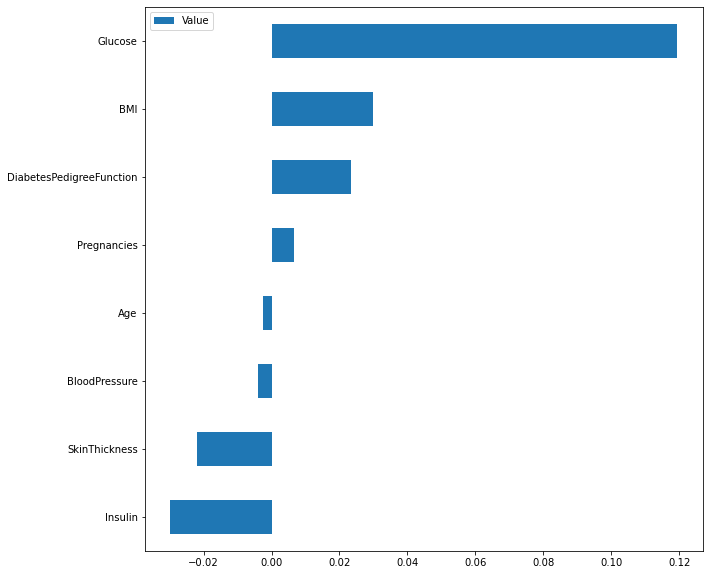

In [25]:
sorted_idx = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted_idx], X_test.columns[sorted_idx], columns=['Value'])
df.plot.barh(figsize=(10,10))

This chart highlights the significant features within the dataset that contribute to the development of diabetes in pregnant women.

# DATA VISUALIZATION
Various studies have been conducted to understand diabetes, a chronic condition characterized by elevated levels of blood sugar. Glucose, a type of blood sugar, serves as a crucial indicator of diabetes in pregnant women.

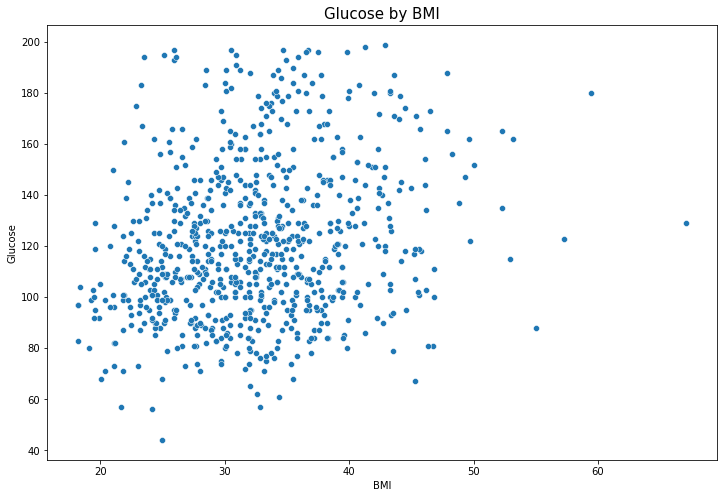

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['BMI'], y=data['Glucose'])
plt.title("Glucose by BMI", size=15)
plt.show()

The provided chart indicates that pregnant women falling within the BMI (Body Mass Index) range of 15 to 45 have varying concentrations of glucose. BMI is a measure of body fat based on an individual's weight and height. The chart suggests that there is a range of glucose concentrations observed in pregnant women across this BMI range.

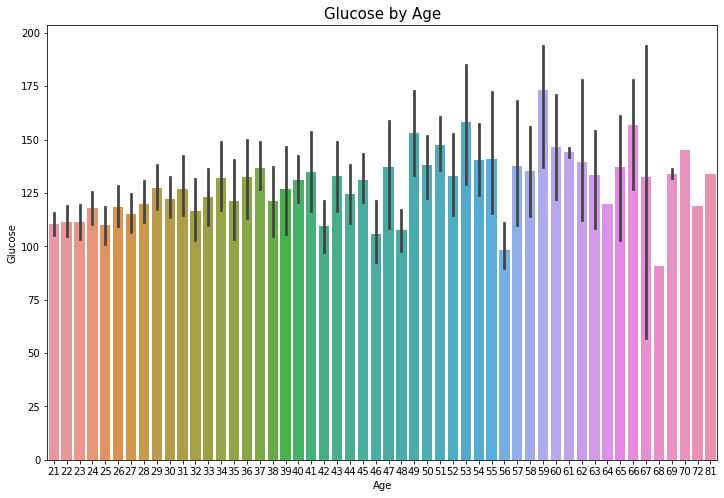

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=data['Age'], y=data['Glucose'])
plt.title("Glucose by Age", size=15)
plt.show()

The presented chart demonstrates that individuals within the age group of 40-70 years exhibit elevated levels of glucose, which can contribute to the development of diabetes. This finding suggests that there is a correlation between age and glucose levels, indicating that older individuals within this age range are more prone to experiencing higher glucose levels, potentially leading to diabetes.

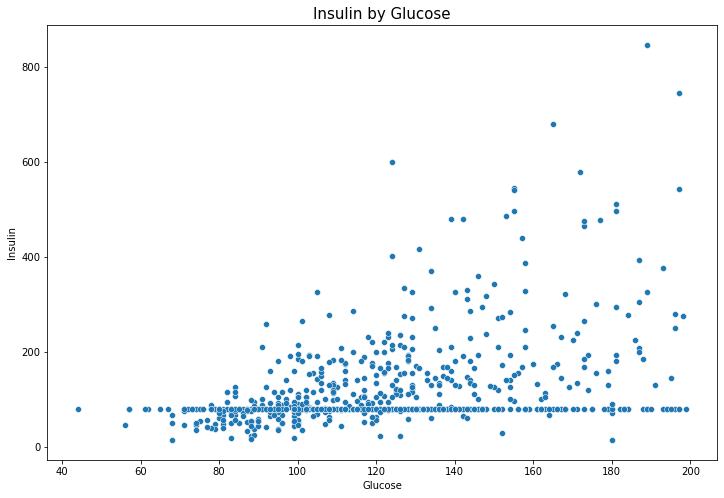

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=data['Glucose'], y=data['Insulin'])
plt.title("Insulin by Glucose", size=15)
plt.show()

The provided chart illustrates that there is a correlation between low levels of insulin and high concentrations of glucose in pregnant women. This indicates that insufficient insulin production or function can lead to elevated glucose levels during pregnancy.

# Credibility and insights
Through various studies, it has been established that diabetes is a chronic condition characterized by elevated blood sugar levels, with glucose being a key indicator of diabetes in pregnant women. The dataset analysis revealed significant predictive factors for diabetes in pregnant women:
The analysis showed that pregnant women within the BMI range of 15 to 45 have concentrations of glucose, indicating that high BMI in pregnant women is a predictor of diabetes.

The analysis also demonstrated that individuals between the ages of 40 and 70 have high levels of glucose, suggesting that age is a predictive factor for diabetes in this age group.
Furthermore, the analysis revealed that pregnant women with low levels of insulin experience high concentrations of glucose, indicating that insufficient insulin production or function is a predictor of diabetes in pregnant women.

These findings are valuable as they provide insights into the risk factors associated with diabetes in pregnant women. They highlight the importance of considering BMI, age, and insulin levels when assessing the likelihood of developing diabetes during pregnancy. Healthcare professionals can utilize this information to identify at-risk individuals, implement appropriate screening measures, and develop tailored management plans to prevent or manage diabetes in pregnant women effectively.

# ACTIONS TO BE TAKEN
Gestational diabetes is a form of diabetes that occurs during pregnancy and poses risks for both the mother and baby. Pregnant women predicted to have diabetes should consider the following actions to manage their condition and reduce complications:

1. Regularly monitor blood sugar levels: Monitoring blood sugar levels helps pregnant women track their glucose levels and ensure they stay within a healthy range. This can be done through regular self-testing using a glucose meter or other recommended methods.

2. Engage in regular exercise: Regular physical activity is beneficial for managing diabetes during pregnancy. Pregnant women should consult with their healthcare provider to determine appropriate exercise routines and activities that are safe and suitable for their condition.

3. Follow a healthy diet: Adopting a healthy and balanced diet is crucial for managing gestational diabetes. Pregnant women should work with a registered dietitian or healthcare provider to develop a meal plan that focuses on nutritious foods, controlled carbohydrate intake, and portion sizes.

4. Medications, if necessary: In some cases, lifestyle modifications may not be sufficient to control blood sugar levels in pregnant women with gestational diabetes. In such instances, healthcare providers may prescribe medications, such as insulin or oral medications, to help manage glucose levels effectively and ensure the well-being of both mother and baby.

By following these recommended actions, pregnant women can take proactive steps to manage their gestational diabetes, minimize complications, and promote a healthy pregnancy for themselves and their babies. It is essential for pregnant women with diabetes to closely collaborate with their healthcare team to receive appropriate guidance, support, and regular monitoring throughout their pregnancy.